# The Observer Pattern

### Problem

Case 1

Let's consider Stock market updates: in a trading application, multiple traders may be interested in receiving updates about the prices of different stocks.

The trader could visit the website every day and check different stocks. But while the stocks are still with the same price, most of these "trips" would be pointless.

Case 2

In the context of a game apps, this could be an issue as well. 

You need to notify different game components (such as scoreboards, health bars, etc.) when the game's state changes (such as when the player collects a power-up or takes damage).

**Goal**:
* Define a `one-to-many dependency between objects` so that `when one object changes state, all its dependents are notified and updated automatically`.

### Solution

The **Observer** pattern is a design pattern that allows `objects` to `be notified of changes to the state` of another object, called the "`subject`."

This pattern is commonly used in user interfaces, distributed systems, and event-driven systems where the state of an object changes frequently.

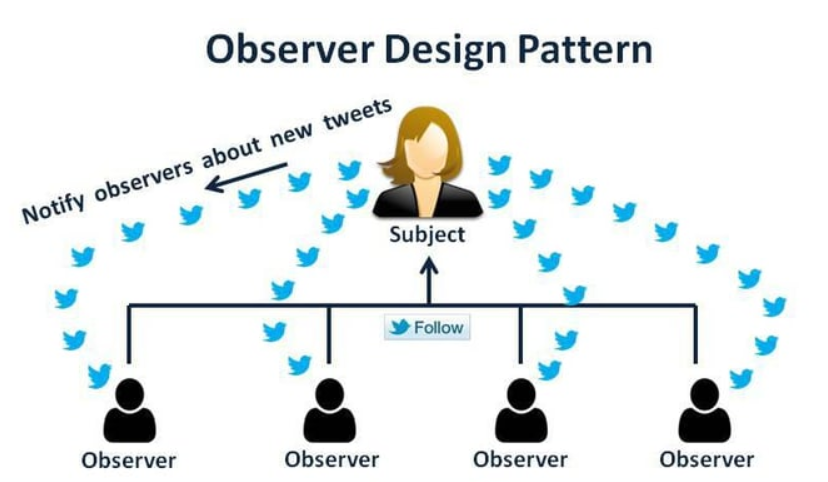

**Key Components**:

**Publisher**: Manages events triggered by changes in its state or behavior, incorporating a subscription infrastructure for subscriber management.

**Subscriber Interface**: Declares the notification interface, typically including an update method to receive event details from the publisher.

**Concrete Subscribers**: Implements specific actions in response to notifications issued by the publisher, ensuring adherence to a uniform interface for decoupling.

**Client**: Creates instances of publishers and subscribers independently and orchestrates the subscription of subscribers to publishers for updates.


### UML Class Diagram

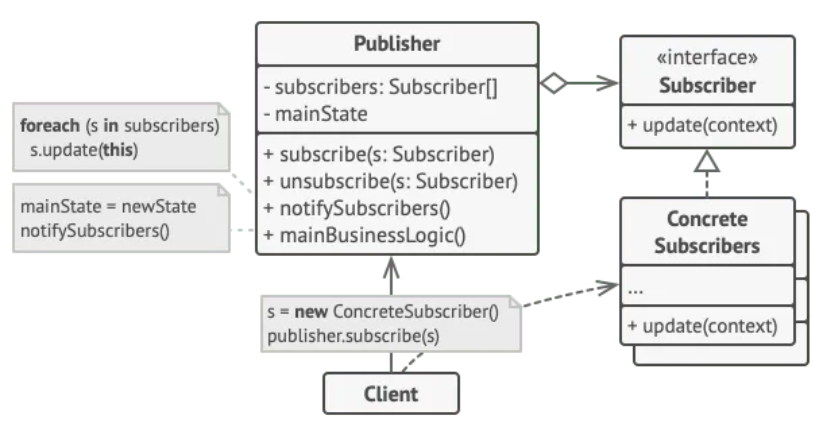

The object that has some interesting state is often called *subject*, but since it’s also going to notify other objects about the changes to its state, we’ll call it `publisher`. 

All other objects that want to track changes to the publisher’s state are called `subscribers`.

The Observer pattern suggests that you add a `subscription mechanism` to the publisher class so individual objects can subscribe to or unsubscribe from a stream of events coming from that publisher. 

The `Subject (Publisher)` maintains a `list of Observers (subscription) `and notifies them of changes in its state. 

The Observer subscribes to the Subject and receives notifications when the state of the Subject changes.

Whenever an important event happens to the `publisher`, it *goes over its subscribers and calls the specific notification method on their objects*

**Note**:
* subscribers need some contextual information to handle the update correctly. 
* for this reason, publishers often pass some `context data as arguments of the notification method`.
* the publisher can pass itself as an argument, letting subscriber fetch any required data directly.

### Example 1 - an abstract implementation 

In [1]:
from abc import ABC, abstractmethod

In [9]:
class Subject:
    def __init__(self, state=None):
        self.__observers = set()
        self.__subject_state = state

    def attach(self, observer):
        observer.subject = self
        self.__observers.add(observer)

    def detach(self, observer):
        observer.subject = None
        self.__observers.discard(observer)

    def __notify(self):
        for observer in self.__observers:
            observer.update(self.__subject_state)
            
    @property
    def subject_state(self):
        return self.__subject_state

    @subject_state.setter
    def subject_state(self, arg):
        self.__subject_state = arg
        self.__notify()

In [ ]:
class Observer(ABC): #abstract class

    def __init__(self):
        self.__subject = None
        self.__observer_state = None
        
    @property
    def subject(self):
        return self.__subject
    
    @subject.setter
    def subject(self, value):
        self.__subject=value
        
    @property
    def observer_state(self):
        return self.__observer_state
    
    @observer_state.setter
    def observer_state(self, value):
        self.__observer_state=value

    @abstractmethod
    def update(self, arg):
        pass

In [13]:
class ConcreteObserver(Observer):

    def update(self, arg):
        print(f"I am updating my state = {self.observer_state} with a new  = {arg}")
        self.observer_state = arg

In [14]:
#client code
subject = Subject(100)
concrete_observer = ConcreteObserver()
subject.attach(concrete_observer)
subject.subject_state = 123


I am updating my state = None with a new  = 123


### Example 2 - Simple Chat Application

In this chat application, users will function as observers. Whenever a user sends a message, all other users within the chat, acting as observers, will receive and display the message.

In [28]:
from abc import ABC, abstractmethod

# Step 1: The Subject - the ChatRoom
class Subject(ABC):
    def __init__(self):
        self.__observers = set()
        self.__messages=[]

    def _attach(self, observer):
        """Adds an observer to the subject's list."""
        self.__observers.add(observer)
        observer.chatRoom=self

    def _detach(self, observer):
        """Removes an observer from the subject's list."""
        self.__observers.remove(observer)
        observer.chatRoom=None

    def _notify_observers(self, txt):
        """Notifies all attached observers."""
        for observer in self.__observers:
            observer.update(txt)
            
    def pushMessage(self, msg):
        self.__messages.append(msg)
        self._notify_observers(self.__messages[-1])
            

In [29]:
class Subscriber(ABC): #Participant - Subscriber Interface
    @abstractmethod
    def update(self,txt): #Abstract method for receiving messages
        pass

In [30]:
#ChatMember - Concrete Subscribers
class ChatMember(Subscriber):
    def __init__(self, name):
        self.name = name
        self.chatRoom=None

    def update(self, message):
        """Receives and displays the message."""
        print(f"{self.name} received: {message}")
        
    def send(self, message):
        self.chatRoom.pushMessage(message)
        

In [31]:
#Client Code
# Create a chat room
general_chat = Subject()

# Create participants
user1 = ChatMember("User1")
user2 = ChatMember("User2")
user3 = ChatMember("User3")

# Participants join the chat room
general_chat._attach(user1)
general_chat._attach(user2)
general_chat._attach(user3)

# Send a message to the chat room
general_chat._notify_observers("Welcome to the chat!")

user1.send(f"Hi from {user1.name}")



User2 received: Welcome to the chat!
User3 received: Welcome to the chat!
User1 received: Welcome to the chat!
User2 received: Hi from User1
User3 received: Hi from User1
User1 received: Hi from User1


## Example 3 - Temperature monitoring system

In a temperature monitoring system, there may be multiple devices that need to know when the temperature changes. 
* The *Subject* in this case would be the temperature sensor, 
* and the *Observers*  would be the devices that need to know about the temperature changes. 

When the temperature changes, the sensor would notify all the devices that are observing it.

In [35]:
from abc import ABC, abstractmethod

In [52]:
class Subject (ABC):
    def __init__(self):
        self.__observers = []
        

    def add_observer(self, *observers):
        for observer in observers:
            if observer not in self.__observers:
                self.__observers.append(observer)

    def remove_observer(self, observer):
        if observer in self.__observers:
            self.__observers.remove(observer)

    def notify_observers(self, *args):
        for observer in self.__observers:
            observer.update(self, *args)



In [53]:
class Observer (ABC):
    @abstractmethod
    def update(self, observable, *args):
        pass

In [55]:
class WeatherStation(Subject):
    def __init__(self):
        super().__init__()
        self.__temperature=None
        
    @property
    def temperature(self):
        return self.__temperature
        
    def set_temperature(self, temperature):
        self.__temperature = temperature
        self.notify_observers(self)

In [56]:
class PhoneDisplay(Observer):
    def update(self, observable, *args):
        if isinstance(observable, WeatherStation):
            temperature = observable.temperature
            print(f"Temperature: {temperature}")

In [57]:
class TFTColoredDisplayConsole (Observer):
    def update(self, observable, *args):
        if isinstance(observable, WeatherStation):
            temperature = observable.temperature
            print(f"Temperature is {temperature} degrees Celsius")

In [58]:
hannaWeatherStation =WeatherStation()
hannaPhoneDisplay =PhoneDisplay()
hannaWeatherStationTFTColoredDisplayConsole =TFTColoredDisplayConsole()


hannaWeatherStation.add_observer(hannaPhoneDisplay,hannaWeatherStationTFTColoredDisplayConsole)


In [59]:
hannaWeatherStation.set_temperature(25)

Temperature: 25
Temperature is 25 degrees Celsius


## Example 4 - Observer pattern in a game app

In [77]:
from abc import ABC, abstractmethod

class ISubject (ABC):
    @abstractmethod
    def registerObserver(self, *observers):
        pass
    
    @abstractmethod
    def removeObserver(self, *observers):
        pass
    
    @abstractmethod
    def notifyObservers(self):
        pass

In [78]:
class IObserver(ABC):
    @abstractmethod
    def update(score: int, health: int) -> None: 
        pass

In [79]:
class Game(ISubject):
    def __init__(self) -> None:
        self.__observers: list[IObserver]=[]
        self.__score:int=0
        self.__health:int=10
        
    def registerObserver(self, *observers):
        for observer in observers:
            if observer not in self.__observers:
                self.__observers.append(observer)
                
    def removeObserver(self, *observers):
        for observer in observers:
            if observer not in self.__observers:
                self.__observers.remove(observer)
                
    
    def notifyObservers(self):
        for observer in self.__observers:
            observer.update(self.__score,self.__health)
            
    def collectPowerUp(self):
        self.__score+=10
        self.notifyObservers()
        
    def takeDamage(self):
        self.__health-=10
        self.notifyObservers()
        

In [80]:
class Scoreboard(IObserver):
    def __init__(self) -> None:
        self.__score=0
        
    def __render(self)-> None:
        print(f"Score: {self.__score}")
        
    def update(self, score: int, health: int) -> None:
        self.__score=score
        self.__render()
        
        

In [81]:
class HealthBar (IObserver):
    def __init__(self) -> None:
        self.__health=0
        
    def __render(self)-> None:
        print(f"Health: {self.__health}")
        
    def update(self, score: int, health: int) -> None:
        self.__health=health
        self.__render()
        

In [82]:
hannaGame=Game()
GUI_elem1=Scoreboard()
GUI_elem2=HealthBar()

hannaGame.registerObserver(GUI_elem1,GUI_elem2)

hannaGame.collectPowerUp()
hannaGame.takeDamage()


hannaGame.removeObserver(GUI_elem1)
hannaGame.takeDamage()

Score: 10
Health: 10
Score: 10
Health: 0
Score: 10
Health: -10
